# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/02_dot_and_inner_products`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/02_dot_and_inner_products/03_matrix_vector_products.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# 3. Matrix-Vector Products: Transformations and Applications

This example demonstrates matrix-vector products and their applications in linear transformations.

Matrix-vector products are fundamental operations that enable us to:

- Apply linear transformations to vectors and points
- Implement neural network layers
- Solve systems of linear equations
- Compute geometric transformations like rotation, scaling and projection

In this tutorial, we'll explore matrix-vector multiplication and its geometric interpretation.


## 3.1 Setup and Imports


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from matplotlib.patches import Polygon
from matplotlib.colors import LinearSegmentedColormap

# Create a nicer colormap for visualizing vectors and matrices
colors = [(0.8, 0.8, 1), (0.1, 0.3, 0.8)]  # Light blue to darker blue
cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=100)


## 3.2 Matrix-Vector Multiplication Basics

A matrix-vector product $A\vec{v}$ is calculated by taking the dot product of each row of matrix $A$ 
with the vector $\vec{v}$. The result is a new vector with the same number of elements as there are rows in $A$.

Let's start with a simple example:


In [2]:
# Create a matrix and a vector
A = torch.tensor([
    [2., 1.],
    [0., 3.],
    [1., 2.]
])

v = torch.tensor([4., 5.])

print(f"Matrix A (shape {A.shape}):")
print(A)
print(f"\nVector v (shape {v.shape}):")
print(v)


Matrix A (shape torch.Size([3, 2])):
tensor([[2., 1.],
        [0., 3.],
        [1., 2.]])

Vector v (shape torch.Size([2])):
tensor([4., 5.])


Let's compute $A\vec{v}$ both manually and using PyTorch:


In [3]:
# Compute the matrix-vector product manually
result_manual = torch.zeros(A.shape[0])

for i in range(A.shape[0]):  # For each row in A
    row_dot_product = 0
    for j in range(A.shape[1]):  # For each element in the row
        row_dot_product += A[i, j] * v[j]
    result_manual[i] = row_dot_product

print("Matrix-vector product (manual calculation):")
for i in range(A.shape[0]):
    print(f"Row {i+1}: {A[i, 0]} × {v[0]} + {A[i, 1]} × {v[1]} = {result_manual[i]}")

print("\nResult vector:")
print(result_manual)


Matrix-vector product (manual calculation):
Row 1: 2.0 × 4.0 + 1.0 × 5.0 = 13.0
Row 2: 0.0 × 4.0 + 3.0 × 5.0 = 15.0
Row 3: 1.0 × 4.0 + 2.0 × 5.0 = 14.0

Result vector:
tensor([13., 15., 14.])


In [4]:
# Compute using PyTorch's matmul function
result_torch = torch.matmul(A, v)
print("Matrix-vector product using PyTorch:")
print(result_torch)

# Check if the results match
print(f"\nResults match: {torch.allclose(result_manual, result_torch)}")


Matrix-vector product using PyTorch:
tensor([13., 15., 14.])

Results match: True


## 3.3 Visualizing Matrix-Vector Multiplication

Let's create a function to visualize matrix-vector multiplication as a linear transformation:


In [5]:
def visualize_matrix_vector_product(A, v, figsize=(12, 10)):
    """
    Visualize a matrix-vector product as a linear transformation.
    
    Args:
        A: 2x2 transformation matrix (PyTorch tensor)
        v: 2D vector to transform (PyTorch tensor)
        figsize: Figure size
    """
    # Convert to numpy
    A_np = A.detach().cpu().numpy()
    v_np = v.detach().cpu().numpy()
    
    # Calculate the transformed vector
    result_np = A_np @ v_np
    
    # Set up the figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Determine the axis limits based on the vectors
    max_coord = max(
        np.max(np.abs(v_np)), 
        np.max(np.abs(result_np)),
        np.max(np.abs(A_np[:, 0])),
        np.max(np.abs(A_np[:, 1]))
    ) * 1.5
    
    ax.set_xlim(-max_coord, max_coord)
    ax.set_ylim(-max_coord, max_coord)
    
    # Add grid and axes
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_aspect('equal')
    
    # Original basis vectors (standard basis)
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    
    # Transformed basis vectors
    t_e1 = A_np @ e1
    t_e2 = A_np @ e2
    
    # Plot original basis vectors
    ax.arrow(0, 0, e1[0], e1[1], head_width=0.1, head_length=0.1, 
             fc='lightgray', ec='lightgray', alpha=0.7, label='Standard basis $e_1$')
    ax.arrow(0, 0, e2[0], e2[1], head_width=0.1, head_length=0.1, 
             fc='lightgray', ec='lightgray', alpha=0.7, label='Standard basis $e_2$')
    
    # Plot transformed basis vectors
    ax.arrow(0, 0, t_e1[0], t_e1[1], head_width=0.1, head_length=0.1, 
             fc='orange', ec='orange', alpha=0.7, label='Transformed basis $Ae_1$')
    ax.arrow(0, 0, t_e2[0], t_e2[1], head_width=0.1, head_length=0.1, 
             fc='purple', ec='purple', alpha=0.7, label='Transformed basis $Ae_2$')
    
    # Plot original vector
    ax.arrow(0, 0, v_np[0], v_np[1], head_width=0.1, head_length=0.1, 
             fc='blue', ec='blue', label='Original vector $v$')
    
    # Plot transformed vector
    ax.arrow(0, 0, result_np[0], result_np[1], head_width=0.1, head_length=0.1, 
             fc='red', ec='red', label='Transformed vector $Av$')
    
    # Show components
    v1, v2 = v_np
    ax.arrow(0, 0, v1*e1[0], v1*e1[1], head_width=0.05, head_length=0.05, 
             fc='lightblue', ec='lightblue', linestyle='--', 
             label=f'Component {v1:.1f}$e_1$')
    ax.arrow(0, 0, v2*e2[0], v2*e2[1], head_width=0.05, head_length=0.05, 
             fc='lightgreen', ec='lightgreen', linestyle='--', 
             label=f'Component {v2:.1f}$e_2$')
    
    # Show transformed components
    ax.arrow(0, 0, v1*t_e1[0], v1*t_e1[1], head_width=0.05, head_length=0.05, 
             fc='coral', ec='coral', linestyle='--', 
             label=f'Component {v1:.1f}$Ae_1$')
    ax.arrow(0, 0, v2*t_e2[0], v2*t_e2[1], head_width=0.05, head_length=0.05, 
             fc='mediumpurple', ec='mediumpurple', linestyle='--', 
             label=f'Component {v2:.1f}$Ae_2$')
    
    # Add vector labels
    ax.text(v_np[0], v_np[1], f"v = [{v_np[0]:.1f}, {v_np[1]:.1f}]", 
            fontsize=12, color='blue', ha='right')
    ax.text(result_np[0], result_np[1], f"Av = [{result_np[0]:.1f}, {result_np[1]:.1f}]", 
            fontsize=12, color='red', ha='right')
    
    # Add title
    matrix_str = f"[{A_np[0, 0]:.1f} {A_np[0, 1]:.1f}; {A_np[1, 0]:.1f} {A_np[1, 1]:.1f}]"
    ax.set_title(f"Matrix-Vector Transformation: A = {matrix_str}", fontsize=14)
    
    ax.legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()
    
    return result_np


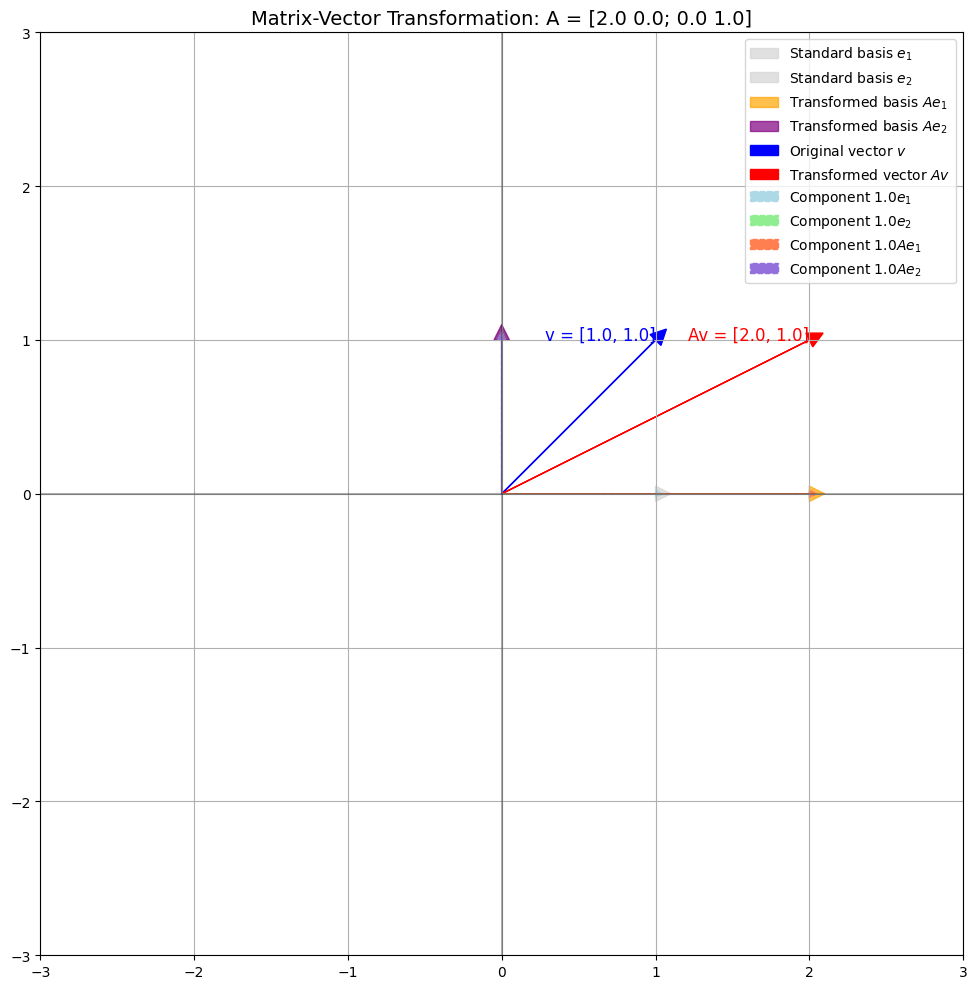

Transformed vector: [2.0, 1.0]


In [6]:
# Define a 2x2 transformation matrix and a vector
A_2d = torch.tensor([
    [2., 0.],
    [0., 1.]
])

v_2d = torch.tensor([1., 1.])

# Visualize the transformation
result = visualize_matrix_vector_product(A_2d, v_2d)
print(f"Transformed vector: [{result[0]:.1f}, {result[1]:.1f}]")


## 3.4 Common Linear Transformations

Let's explore some common linear transformations represented by matrices:

1. Scaling
2. Rotation
3. Shearing
4. Reflection

We'll visualize each transformation on a square to see the effect:


In [7]:
def create_square():
    """Create a unit square centered at the origin."""
    return torch.tensor([
        [-0.5, -0.5],  # Bottom-left
        [0.5, -0.5],   # Bottom-right
        [0.5, 0.5],    # Top-right
        [-0.5, 0.5]    # Top-left
    ])

def visualize_transformation(A, name, figsize=(10, 5)):
    """
    Visualize a linear transformation on a square.
    
    Args:
        A: 2x2 transformation matrix (PyTorch tensor)
        name: Name of the transformation
        figsize: Figure size
    """
    # Convert to numpy
    A_np = A.detach().cpu().numpy()
    
    # Create a square
    square = create_square()
    square_np = square.detach().cpu().numpy()
    
    # Transform the square
    transformed_square = torch.matmul(square, A.T)
    transformed_square_np = transformed_square.detach().cpu().numpy()
    
    # Set up the figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Determine plot limits
    max_coord = max(1.5, np.max(np.abs(transformed_square_np)) * 1.2)
    
    # Plot original square
    for ax in [ax1, ax2]:
        ax.set_xlim(-max_coord, max_coord)
        ax.set_ylim(-max_coord, max_coord)
        ax.grid(True)
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        ax.set_aspect('equal')
    
    # Draw the original square in both subplots
    polygon1 = Polygon(square_np, alpha=0.5, fc='blue', ec='blue', label='Original')
    ax1.add_patch(polygon1)
    polygon2 = Polygon(square_np, alpha=0.3, fc='lightblue', ec='blue', 
                       linestyle='--', label='Original')
    ax2.add_patch(polygon2)
    
    # Draw the transformed square in the second subplot
    polygon3 = Polygon(transformed_square_np, alpha=0.5, fc='red', ec='red', label='Transformed')
    ax2.add_patch(polygon3)
    
    # Add arrows for basis vectors in both plots
    # Original basis
    ax1.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, fc='blue', ec='blue', label='$e_1$')
    ax1.arrow(0, 0, 0, 1, head_width=0.1, head_length=0.1, fc='blue', ec='blue', label='$e_2$')
    
    # Original basis in the second plot
    ax2.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, fc='blue', ec='blue', 
              alpha=0.3, linestyle='--')
    ax2.arrow(0, 0, 0, 1, head_width=0.1, head_length=0.1, fc='blue', ec='blue', 
              alpha=0.3, linestyle='--')
    
    # Transformed basis
    ax2.arrow(0, 0, A_np[0, 0], A_np[1, 0], head_width=0.1, head_length=0.1, 
              fc='red', ec='red', label='$Ae_1$')
    ax2.arrow(0, 0, A_np[0, 1], A_np[1, 1], head_width=0.1, head_length=0.1, 
              fc='red', ec='red', label='$Ae_2$')
    
    # Add titles and labels
    matrix_str = np.array2string(A_np, precision=2, separator=' ')
    ax1.set_title(f"Original Square")
    ax2.set_title(f"{name} Transformation\nA = {matrix_str}")
    
    for ax in [ax1, ax2]:
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend()
    
    plt.tight_layout()
    plt.show()


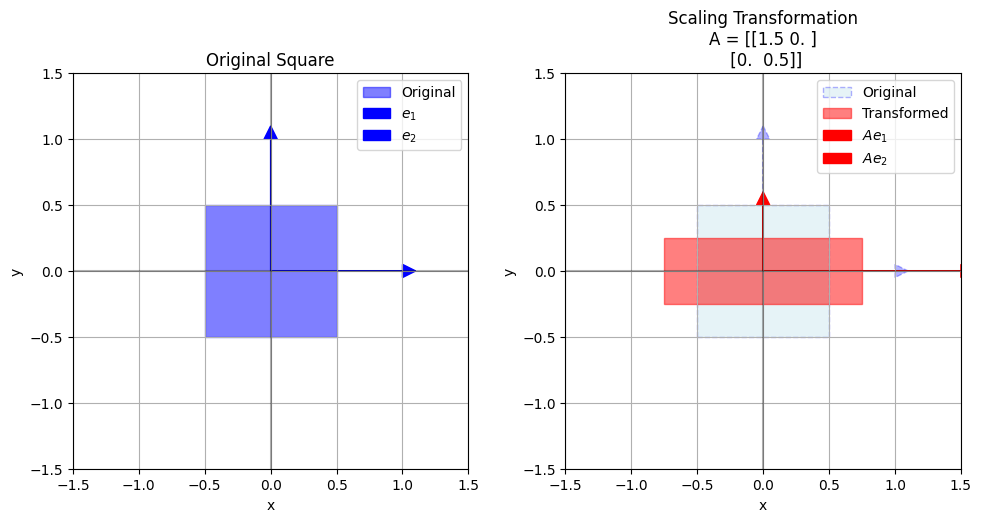

In [8]:
# 1. Scaling transformation
scale_x, scale_y = 1.5, 0.5
scaling_matrix = torch.tensor([
    [scale_x, 0],
    [0, scale_y]
])

visualize_transformation(scaling_matrix, "Scaling")


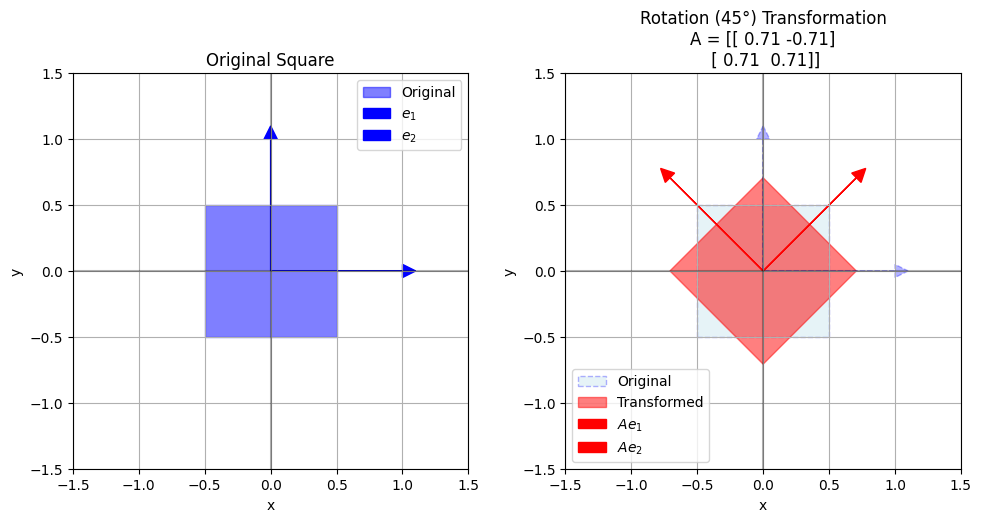

In [9]:
# 2. Rotation transformation (45 degrees)
angle = 45 * np.pi / 180  # Convert to radians
rotation_matrix = torch.tensor([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)]
], dtype=torch.float32)

visualize_transformation(rotation_matrix, "Rotation (45°)")


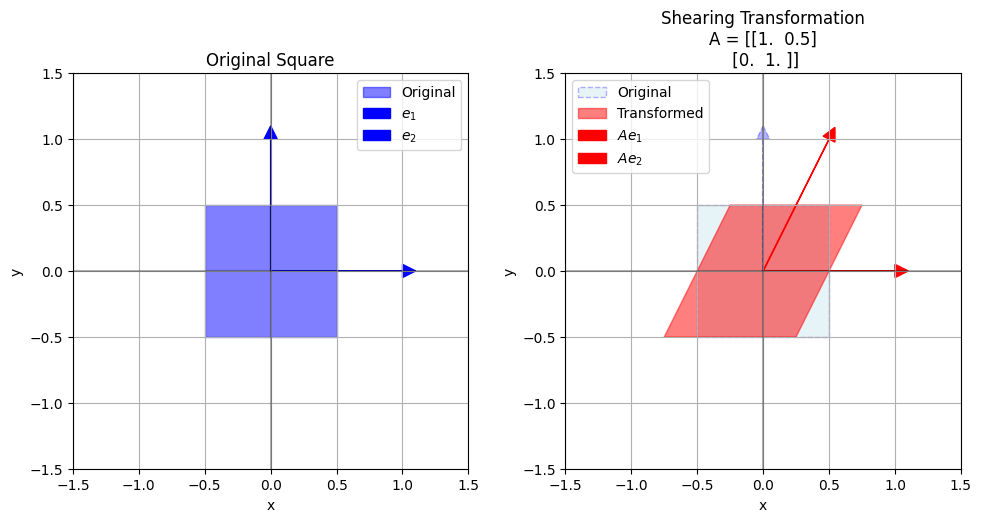

In [10]:
# 3. Shearing transformation
shear_x = 0.5
shearing_matrix = torch.tensor([
    [1.0, shear_x],
    [0.0, 1.0]
], dtype=torch.float32)

visualize_transformation(shearing_matrix, "Shearing")


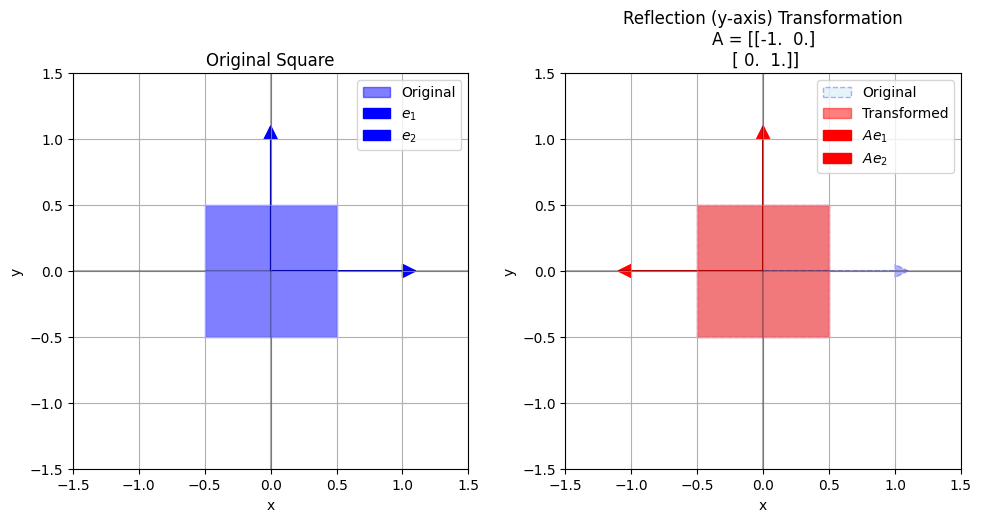

In [11]:
# 4. Reflection across y-axis
reflection_matrix = torch.tensor([
    [-1.0, 0.0],
    [0.0, 1.0]
], dtype=torch.float32)

visualize_transformation(reflection_matrix, "Reflection (y-axis)")


## 3.5 Composing Transformations

One powerful aspect of matrix transformations is that we can compose them by 
multiplying matrices together. Let's create a function to visualize 
composed transformations:


In [12]:
def visualize_composed_transformation(A_list, names, figsize=(12, 8)):
    """
    Visualize a sequence of transformations.
    
    Args:
        A_list: List of transformation matrices
        names: List of transformation names
        figsize: Figure size
    """
    # Create a square
    square = create_square()
    square_np = square.detach().cpu().numpy()
    
    # Calculate the composed transformation
    A_composed = torch.eye(2, dtype=torch.float32)
    for A in A_list:
        A_composed = torch.matmul(A_composed, A)
    
    A_composed_np = A_composed.detach().cpu().numpy()
    
    # Transform the square with each individual transformation and the composed one
    transformed_squares = []
    current_square = square
    
    for A in A_list:
        current_square = torch.matmul(current_square, A.T)
        transformed_squares.append(current_square.detach().cpu().numpy())
    
    # Set up the figure
    fig, axes = plt.subplots(1, len(A_list) + 2, figsize=figsize)
    
    # Determine plot limits based on the final transformation
    final_square = transformed_squares[-1]
    max_coord = max(1.5, np.max(np.abs(final_square)) * 1.2)
    
    # Configure all subplots
    for ax in axes:
        ax.set_xlim(-max_coord, max_coord)
        ax.set_ylim(-max_coord, max_coord)
        ax.grid(True)
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        ax.set_aspect('equal')
    
    # Plot the original square
    polygon = Polygon(square_np, alpha=0.5, fc='blue', ec='blue', label='Original')
    axes[0].add_patch(polygon)
    axes[0].set_title("Original Square")
    
    # Plot each transformation
    colors = plt.cm.tab10(np.linspace(0, 1, len(A_list)))
    
    for i, (A, name, transformed_square) in enumerate(zip(A_list, names, transformed_squares)):
        # Draw the transformed square
        polygon = Polygon(transformed_square, alpha=0.5, fc=colors[i], ec=colors[i], 
                         label=f'After {name}')
        axes[i+1].add_patch(polygon)
        
        # Add the original square outline
        polygon_orig = Polygon(square_np, alpha=0.2, fc='blue', ec='blue', 
                              linestyle='--', label='Original')
        axes[i+1].add_patch(polygon_orig)
        
        # Add title
        A_np = A.detach().cpu().numpy()
        matrix_str = np.array2string(A_np, precision=2, separator=' ')
        axes[i+1].set_title(f"{name}\nA_{i+1} = {matrix_str}")
    
    # Plot the composed transformation
    polygon_final = Polygon(final_square, alpha=0.5, fc='red', ec='red', 
                           label='Final result')
    axes[-1].add_patch(polygon_final)
    
    # Add the original square outline to the final plot
    polygon_orig = Polygon(square_np, alpha=0.2, fc='blue', ec='blue', 
                          linestyle='--', label='Original')
    axes[-1].add_patch(polygon_orig)
    
    # Add the title for the composed transformation
    matrix_str = np.array2string(A_composed_np, precision=2, separator=' ')
    axes[-1].set_title(f"Composed Transformation\nA = {matrix_str}")
    
    # Add legends
    for ax in axes:
        ax.legend(loc='upper right', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    return A_composed_np


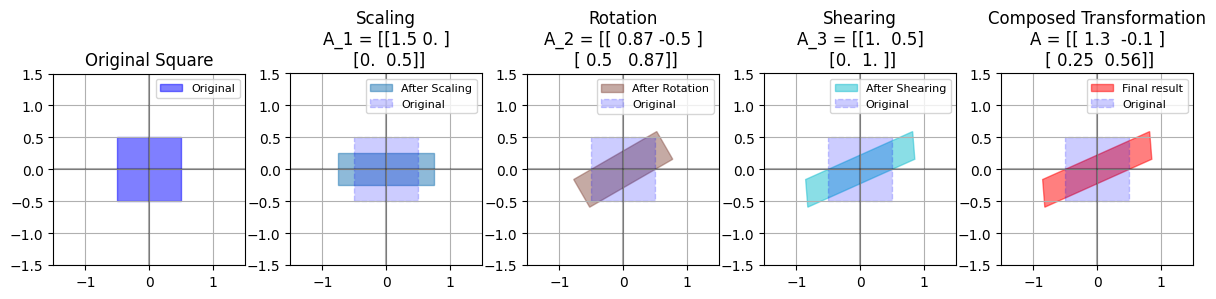

Composed transformation matrix:
[[ 1.299038   -0.10048097]
 [ 0.25        0.5580127 ]]


In [13]:
# Define a sequence of transformations
# 1. Scale
# 2. Rotate
# 3. Shear

scale_matrix = torch.tensor([
    [1.5, 0.0],
    [0.0, 0.5]
], dtype=torch.float32)

angle = 30 * np.pi / 180  # 30 degrees in radians
rotation_matrix = torch.tensor([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)]
], dtype=torch.float32)

shear_matrix = torch.tensor([
    [1.0, 0.5],
    [0.0, 1.0]
], dtype=torch.float32)

transformation_matrices = [scale_matrix, rotation_matrix, shear_matrix]
transformation_names = ["Scaling", "Rotation", "Shearing"]

# Visualize the composition
composed_matrix = visualize_composed_transformation(
    transformation_matrices, transformation_names)

print("Composed transformation matrix:")
print(composed_matrix)


## 3.6 Applications: Neural Network Layers

One of the most common applications of matrix-vector products is in neural networks.
Each neuron in a fully-connected layer performs a dot product between its weights and the input vector,
which together form a matrix-vector product for the whole layer.

Let's implement a simple example to demonstrate this:


In [14]:
def visualize_neural_layer(W, b, x, figsize=(12, 8)):
    """
    Visualize a neural network layer as a matrix-vector product.
    
    Args:
        W: Weight matrix (PyTorch tensor)
        b: Bias vector (PyTorch tensor)
        x: Input vector (PyTorch tensor)
        figsize: Figure size
    """
    # Convert to numpy
    W_np = W.detach().cpu().numpy()
    b_np = b.detach().cpu().numpy()
    x_np = x.detach().cpu().numpy()
    
    # Calculate the output (before activation)
    z_np = np.dot(W_np, x_np) + b_np
    
    # Apply ReLU activation
    a_np = np.maximum(0, z_np)
    
    # Set up the figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create positions for the nodes
    input_layer_pos = np.array([[0, i] for i in range(len(x_np))])
    hidden_layer_pos = np.array([[1, i] for i in range(len(z_np))])
    
    # Determine y limits
    max_nodes = max(len(x_np), len(z_np))
    
    # Plot the nodes
    ax.scatter(input_layer_pos[:, 0], input_layer_pos[:, 1], 
               s=500, c=plt.cm.Blues(0.5 + 0.5 * x_np / np.max(np.abs(x_np))), 
               edgecolor='black', linewidth=1, zorder=10)
    
    ax.scatter(hidden_layer_pos[:, 0], hidden_layer_pos[:, 1], 
               s=500, c=plt.cm.Reds(0.5 + 0.5 * a_np / np.max(np.abs(a_np) + 1e-10)), 
               edgecolor='black', linewidth=1, zorder=10)
    
    # Add weights as line thickness and color
    for i, out_pos in enumerate(hidden_layer_pos):
        for j, in_pos in enumerate(input_layer_pos):
            weight = W_np[i, j]
            width = 0.5 + 3 * abs(weight) / np.max(np.abs(W_np) + 1e-10)
            color = 'red' if weight < 0 else 'blue'
            alpha = 0.3 + 0.7 * abs(weight) / np.max(np.abs(W_np) + 1e-10)
            ax.plot([in_pos[0], out_pos[0]], [in_pos[1], out_pos[1]], 
                    c=color, linewidth=width, alpha=alpha, zorder=1)
    
    # Add labels to the nodes
    for i, pos in enumerate(input_layer_pos):
        ax.text(pos[0], pos[1], f"x{i+1}={x_np[i]:.2f}", 
                ha='center', va='center', fontsize=10, 
                bbox=dict(facecolor='white', alpha=0.7))
    
    for i, pos in enumerate(hidden_layer_pos):
        text = f"z{i+1}={z_np[i]:.2f}\na{i+1}={a_np[i]:.2f}\nb{i+1}={b_np[i]:.2f}"
        ax.text(pos[0], pos[1], text, 
                ha='center', va='center', fontsize=9, 
                bbox=dict(facecolor='white', alpha=0.7))
    
    # Add calculation formula
    formula = "Forward Pass Calculation:\n"
    formula += "z = Wx + b\n"
    formula += "a = ReLU(z)"
    ax.text(0.5, max_nodes + 0.5, formula, 
            ha='center', va='center', fontsize=12, 
            bbox=dict(facecolor='lightgray', alpha=0.5))
    
    # Add weight matrix visualization
    cell_text = []
    for row in W_np:
        cell_text.append([f"{val:.2f}" for val in row])
    
    ax.table(cellText=cell_text, 
             colLabels=[f"x{i+1}" for i in range(len(x_np))],
             rowLabels=[f"z{i+1}" for i in range(len(z_np))],
             loc='bottom', bbox=[0.1, -0.5, 0.8, 0.3])
    
    # Set axis properties
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-1, max_nodes + 1)
    ax.set_title("Neural Network Layer as Matrix-Vector Product", fontsize=14)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Input Layer", "Hidden Layer"])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return z_np, a_np


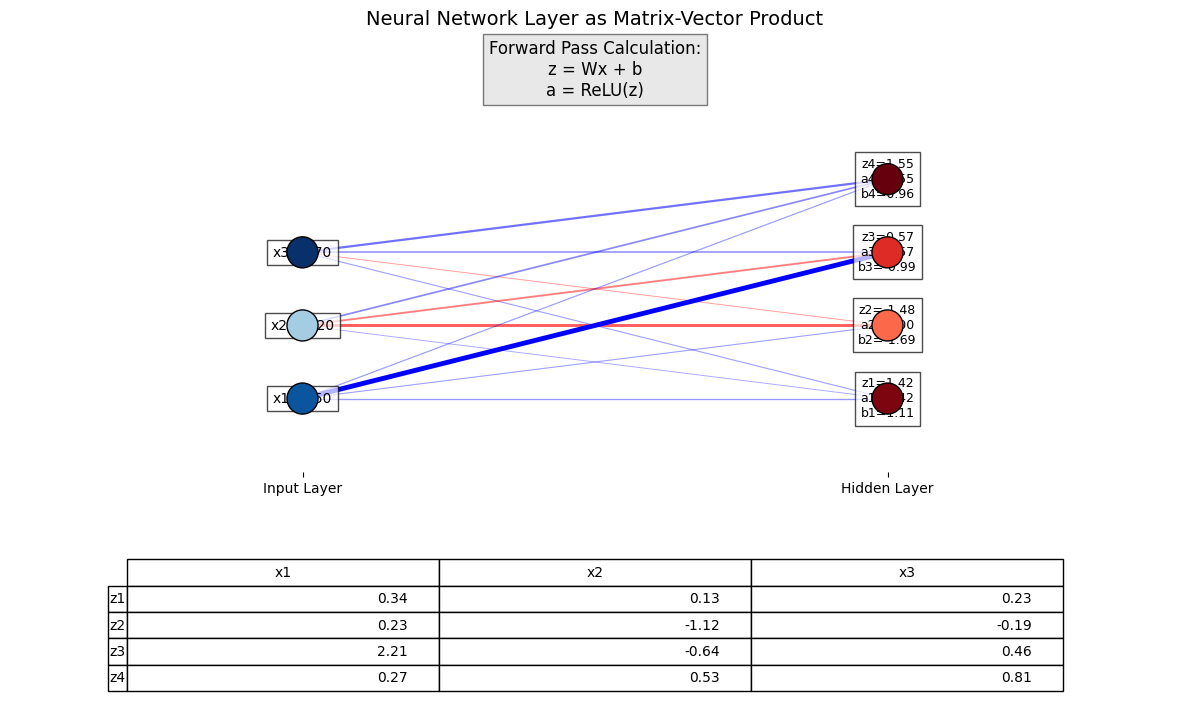

Pre-activation output (z):
[ 1.4169972 -1.4804909  0.5659002  1.5512164]

Post-activation output (a = ReLU(z)):
[1.4169972 0.        0.5659002 1.5512164]


In [15]:
# Create a simple neural layer
input_size = 3
output_size = 4

# Create random weights and biases
torch.manual_seed(42)  # For reproducibility
W = torch.randn(output_size, input_size)
b = torch.randn(output_size)

# Create a sample input
x = torch.tensor([0.5, -0.2, 0.7])

# Visualize the neural layer
z, a = visualize_neural_layer(W, b, x)

print("Pre-activation output (z):")
print(z)
print("\nPost-activation output (a = ReLU(z)):")
print(a)


## 3.7 Matrix-Vector Products for Solving Linear Equations

Matrix-vector products are also used to solve systems of linear equations:

$$A\vec{x} = \vec{b}$$

This system represents multiple linear equations where:
- $A$ is the coefficient matrix
- $\vec{x}$ is the vector of unknowns
- $\vec{b}$ is the right-hand side vector

Let's visualize how matrix-vector products can be used to check solutions to linear systems:


In [16]:
def visualize_linear_system(A, x, b, figsize=(10, 8)):
    """
    Visualize a system of linear equations as lines in 2D space.
    
    Args:
        A: 2x2 coefficient matrix (PyTorch tensor)
        x: Solution vector (PyTorch tensor)
        b: Right-hand side vector (PyTorch tensor)
        figsize: Figure size
    """
    # Convert to numpy
    A_np = A.detach().cpu().numpy()
    x_np = x.detach().cpu().numpy()
    b_np = b.detach().cpu().numpy()
    
    # Calculate Ax to verify it equals b
    Ax = A_np @ x_np
    
    # Set up the figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set limits
    margin = 1.0
    x_min, x_max = x_np[0] - margin, x_np[0] + margin
    y_min, y_max = x_np[1] - margin, x_np[1] + margin
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Plot the solution point
    ax.scatter(x_np[0], x_np[1], c='red', s=100, zorder=10, label='Solution x')
    ax.text(x_np[0], x_np[1], f"x = [{x_np[0]:.2f}, {x_np[1]:.2f}]", 
            fontsize=12, ha='left', va='bottom')
    
    # Plot the lines representing each equation
    colors = ['blue', 'green']
    for i in range(2):
        # The line is a1*x + a2*y = b
        a1, a2 = A_np[i]
        bi = b_np[i]
        
        # Calculate points for the line
        if abs(a2) > 1e-10:  # Avoid division by zero
            x_vals = np.linspace(x_min, x_max, 100)
            y_vals = (bi - a1 * x_vals) / a2
            valid_mask = (y_vals >= y_min) & (y_vals <= y_max)
            ax.plot(x_vals[valid_mask], y_vals[valid_mask], 
                    c=colors[i], linewidth=2, label=f"Equation {i+1}")
        else:  # Vertical line
            x_val = bi / a1
            ax.axvline(x=x_val, c=colors[i], linewidth=2, label=f"Equation {i+1}")
        
        # Add the equation as text
        if a2 >= 0:
            eq_text = f"{a1:.2f}x + {a2:.2f}y = {bi:.2f}"
        else:
            eq_text = f"{a1:.2f}x - {abs(a2):.2f}y = {bi:.2f}"
        
        # Position the text at a point on the line
        text_x = x_min + 0.7 * (x_max - x_min)
        if abs(a2) > 1e-10:
            text_y = (bi - a1 * text_x) / a2
            if text_y < y_min or text_y > y_max:
                text_x = x_min + 0.3 * (x_max - x_min)
                text_y = (bi - a1 * text_x) / a2
        else:
            text_y = y_min + 0.7 * (y_max - y_min)
        
        if y_min <= text_y <= y_max:
            ax.text(text_x, text_y, eq_text, 
                    fontsize=10, ha='center', va='center', 
                    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'),
                    color=colors[i])
    
    # Add grid and axes
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Add title and verification info
    ax.set_title("Linear System: $A\\vec{x} = \\vec{b}$", fontsize=14)
    
    # Add verification text
    verification_text = "Verification:\n"
    verification_text += f"A = {np.array2string(A_np, precision=2)}\n"
    verification_text += f"x = {np.array2string(x_np, precision=2)}\n"
    verification_text += f"b = {np.array2string(b_np, precision=2)}\n"
    verification_text += f"Ax = {np.array2string(Ax, precision=2)}\n"
    verification_text += f"Ax = b? {np.allclose(Ax, b_np)}"
    
    ax.text(0.05, 0.05, verification_text, 
            transform=ax.transAxes, fontsize=10, va='bottom', ha='left',
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))
    
    ax.legend()
    plt.tight_layout()
    plt.show()


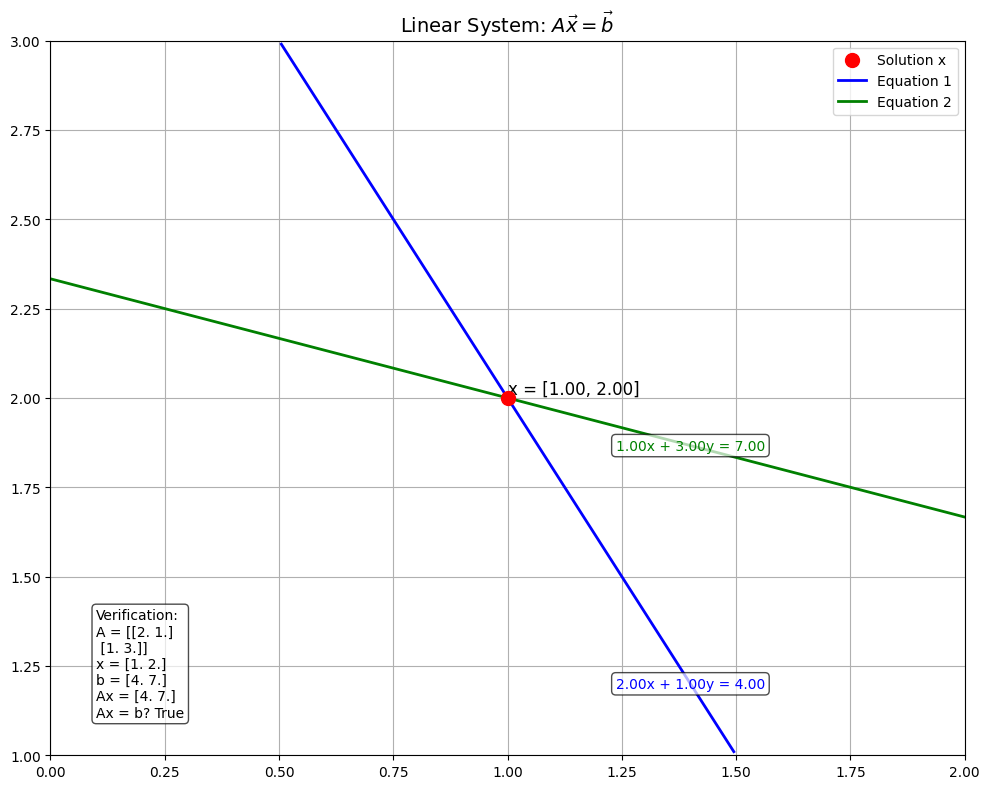

In [17]:
# Create a system of linear equations
A = torch.tensor([
    [2., 1.],
    [1., 3.]
])

# Solution vector
x = torch.tensor([1., 2.])

# Calculate b = Ax
b = torch.matmul(A, x)

# Visualize the system
visualize_linear_system(A, x, b)


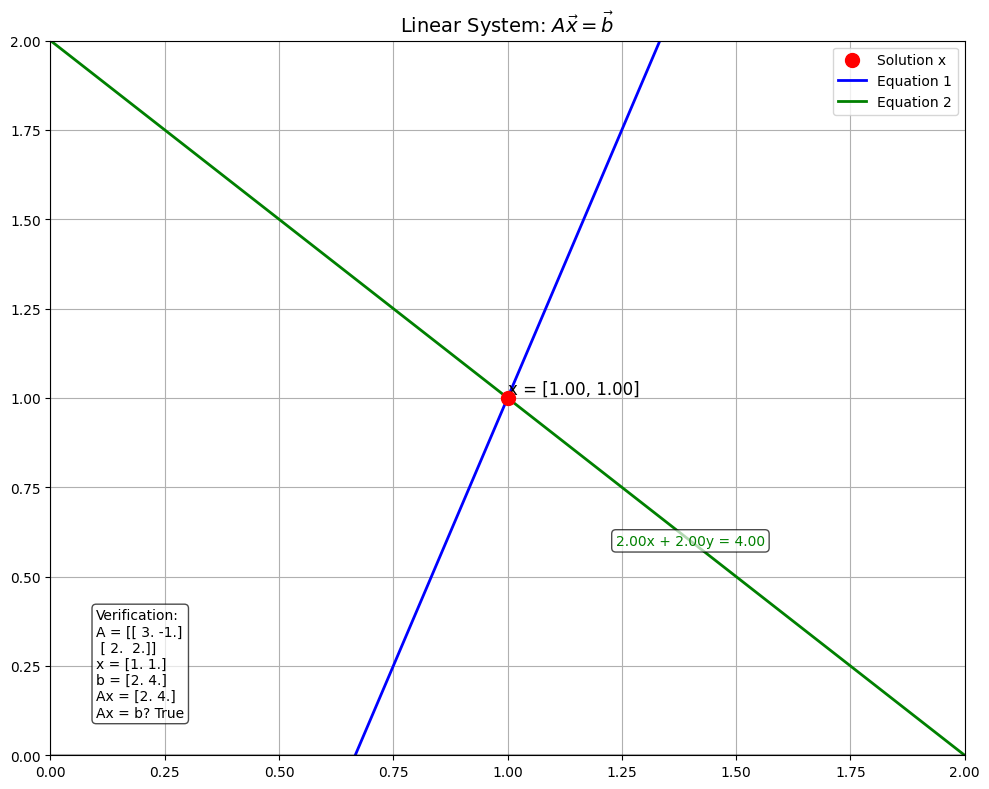

In [18]:
# Another example with a different system
A2 = torch.tensor([
    [3., -1.],
    [2., 2.]
])

# Solution vector
x2 = torch.tensor([1., 1.])

# Calculate b = Ax
b2 = torch.matmul(A2, x2)

# Visualize the system
visualize_linear_system(A2, x2, b2)


## 3.8 Conclusion

In this section, we've explored matrix-vector products and their applications:

- Basic matrix-vector multiplication
- Geometric interpretation as linear transformations
- Common transformations (scaling, rotation, shearing, reflection)
- Composing transformations by matrix multiplication
- Applications in neural networks and solving linear systems

Matrix-vector products are one of the most fundamental operations in linear algebra
and form the basis for many applications in computer graphics, machine learning,
physics simulations, and data analysis.

In the next section, we'll explore different inner product definitions and their use cases.